<a href="https://colab.research.google.com/github/Dileep2896/Machine-Learning/blob/main/Upper_Confidence_Bound_Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound - Reinforcement Learning

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the datasets

In [2]:
dataset = pd.read_csv("/content/Ads_CTR_Optimisation.csv")

In [3]:
dataset[:10]

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


## Implement UCB

In [4]:
import math
N = 10000
d = 10
ads_selected = []
number_of_selections = [0] * d
sums_of_reward = [0] * d
total_reward = 0
for n in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):
    if (number_of_selections[i] > 0):
      average_reward = sums_of_reward[i] / number_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / number_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  number_of_selections[ad] += 1
  reward = dataset.values[n, ad]
  sums_of_reward[ad] += reward
  total_reward += reward

## Visualising The Results

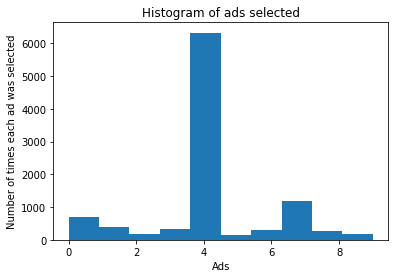

In [5]:
plt.hist(ads_selected)
plt.title('Histogram of ads selected')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()